In [ ]:
# Common Data Errors Examples

# 1. Missing Data:
# Task 1: Review a dataset where some customer emails are missing. Identify how
# many records are incomplete.
# Task 2: Examine a sales dataset with missing transaction dates and determine the
# percentage of missing data.
# Task 3: Identify missing department information in an employee registry.






# 2. Duplicate Data:
# Task 1: Analyze a customer dataset with duplicate entries and count the number of
# duplicates.
# Task 2: Review supplier data and identify any repeated supplier names.
# Task 3: Examine a product inventory list for duplicates in product IDs.






# 3. Inconsistent Formatting:
# Task 1: Spot inconsistencies in date formats (e.g., DD/MM/YYYY vs. MM/DD/YYYY)
# in a dataset.
# Task 2: Identify phone numbers with varying formats in a contact list.
# Task 3: Review address data for discrepancies in state abbreviations (e.g., CA vs.
# Calif.).





# 4. Data Drift:
# Task 1: Compare monthly revenues over six months to identify data drift.
# Task 2: Analyze user engagement metrics from a web application over different
# quarters.
# Task 3: Review a stock price dataset to detect any anomalies over a year.





=== 1. Missing Data ===
Task 1: Number of records with missing customer emails: 2
Task 2: Percentage of missing transaction dates: 50.00%
Task 3: Number of employees with missing department info: 2


=== 2. Duplicate Data ===
Task 1: Number of duplicate customer records: 3
Task 2: Repeated supplier names:
['Acme Corp']
Task 3: Duplicate product IDs:
['P002' 'P001']


=== 3. Inconsistent Formatting ===
Task 1: Dates with inconsistent/unparseable formats:
Series([], dtype: object)
Task 2: Normalized phone numbers:
0     1234567890
1     1234567890
2     1234567890
3    11234567890
dtype: object
Task 3: Standardized addresses:
0     123 Main St, Los Angeles, CA
1    456 Elm St, San Francisco, CA
2        789 Oak St, San Diego, CA
3      101 Pine St, Sacramento, CA
dtype: object


=== 4. Data Drift ===
Task 1: Monthly revenue percentage changes:
0     5.000000
1    -1.666667
2     1.818182
3    15.384615
4    28.000000
5    21.428571
dtype: float64
Mean revenue difference: 1500.0


/tmp/ipykernel_36408/2667507580.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['transaction_date'].replace('', np.nan, inplace=True)


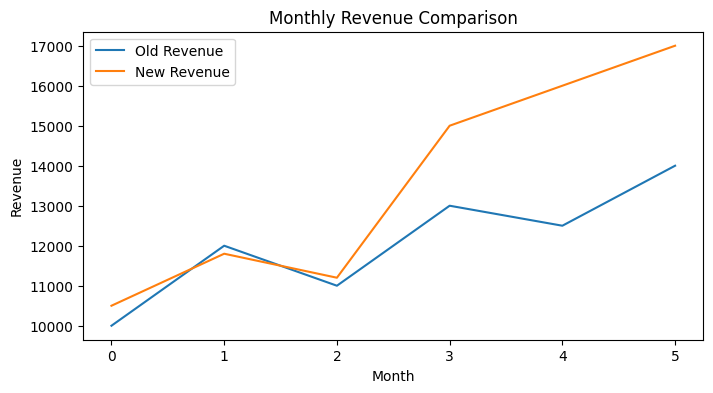

Task 2: User engagement comparison:
  quarter  active_users  avg_session_time
0      Q1          1000               5.5
1      Q2          1200               5.8
2      Q3          1100               5.2
3      Q4          1300               5.1
Task 3: Detected anomalies in stock prices:
3    150
dtype: int64


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Missing Data
# ---------------------------

print("=== 1. Missing Data ===")

# Sample dataset for customer emails (Task 1)
customer_data = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'email': ['alice@example.com', None, 'charlie@example.com', '', 'eve@example.com']
})

# Task 1: Count incomplete records (missing emails)
# Consider None or empty string as missing
customer_data['email_missing'] = customer_data['email'].isnull() | (customer_data['email'].str.strip() == '')
num_incomplete = customer_data['email_missing'].sum()
print(f"Task 1: Number of records with missing customer emails: {num_incomplete}")

# Sample sales dataset with missing transaction dates (Task 2)
sales_data = pd.DataFrame({
    'transaction_id': [101, 102, 103, 104],
    'transaction_date': ['2025-01-10', None, '2025-01-12', '']
})

# Convert empty strings to NaN for consistency
sales_data['transaction_date'].replace('', np.nan, inplace=True)

# Task 2: Percentage of missing transaction dates
missing_dates_pct = sales_data['transaction_date'].isnull().mean() * 100
print(f"Task 2: Percentage of missing transaction dates: {missing_dates_pct:.2f}%")

# Sample employee registry with missing department info (Task 3)
employee_data = pd.DataFrame({
    'employee_id': [1001, 1002, 1003, 1004],
    'department': ['HR', None, 'Finance', '']
})

employee_data['department_missing'] = employee_data['department'].isnull() | (employee_data['department'].str.strip() == '')
num_missing_dept = employee_data['department_missing'].sum()
print(f"Task 3: Number of employees with missing department info: {num_missing_dept}")

print("\n")

# ---------------------------
# 2. Duplicate Data
# ---------------------------

print("=== 2. Duplicate Data ===")

# Sample customer dataset with duplicates (Task 1)
customers = pd.DataFrame({
    'customer_id': [1, 2, 2, 3, 4, 4, 4],
    'name': ['Alice', 'Bob', 'Bob', 'Charlie', 'David', 'David', 'David']
})

# Task 1: Count duplicate entries (based on customer_id and name)
duplicates_count = customers.duplicated(subset=['customer_id', 'name']).sum()
print(f"Task 1: Number of duplicate customer records: {duplicates_count}")

# Sample supplier data with repeated supplier names (Task 2)
suppliers = pd.DataFrame({
    'supplier_id': [201, 202, 203, 204],
    'supplier_name': ['Acme Corp', 'Beta Ltd', 'Acme Corp', 'Delta Inc']
})

# Task 2: Identify repeated supplier names
repeated_suppliers = suppliers['supplier_name'][suppliers['supplier_name'].duplicated()]
print(f"Task 2: Repeated supplier names:\n{repeated_suppliers.unique()}")

# Sample product inventory with duplicate product IDs (Task 3)
inventory = pd.DataFrame({
    'product_id': ['P001', 'P002', 'P003', 'P002', 'P004', 'P001'],
    'product_name': ['Widget', 'Gadget', 'Thing', 'Gadget', 'Doohickey', 'Widget']
})

# Task 3: Find duplicate product IDs
duplicate_product_ids = inventory['product_id'][inventory['product_id'].duplicated()]
print(f"Task 3: Duplicate product IDs:\n{duplicate_product_ids.unique()}")

print("\n")

# ---------------------------
# 3. Inconsistent Formatting
# ---------------------------

print("=== 3. Inconsistent Formatting ===")

# Sample dataset with inconsistent date formats (Task 1)
dates = pd.Series(['12/31/2024', '31/12/2024', '01/15/2025', '15/01/2025'])

# Task 1: Detect inconsistent date formats
def detect_date_format(date_str):
    for fmt in ("%m/%d/%Y", "%d/%m/%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return None

parsed_dates = dates.apply(detect_date_format)
inconsistent_dates = parsed_dates.isnull()
print(f"Task 1: Dates with inconsistent/unparseable formats:\n{dates[inconsistent_dates]}")

# Sample phone numbers with varying formats (Task 2)
phone_numbers = pd.Series([
    '123-456-7890',
    '(123) 456-7890',
    '1234567890',
    '+1 123 456 7890'
])

# Task 2: Normalize phone numbers to digits only and identify inconsistent formats
normalized_phones = phone_numbers.str.replace(r'\D', '', regex=True)
print("Task 2: Normalized phone numbers:")
print(normalized_phones)

# Sample addresses with inconsistent state abbreviations (Task 3)
addresses = pd.Series([
    '123 Main St, Los Angeles, CA',
    '456 Elm St, San Francisco, Calif.',
    '789 Oak St, San Diego, CA',
    '101 Pine St, Sacramento, Calif'
])

# Task 3: Identify inconsistent state abbreviations
def standardize_state(addr):
    if 'Calif' in addr:
        return addr.replace('Calif.', 'CA').replace('Calif', 'CA')
    return addr

standardized_addresses = addresses.apply(standardize_state)
print("Task 3: Standardized addresses:")
print(standardized_addresses)

print("\n")

# ---------------------------
# 4. Data Drift
# ---------------------------

print("=== 4. Data Drift ===")

# Task 1: Compare monthly revenues over six months
monthly_revenue_old = pd.Series([10000, 12000, 11000, 13000, 12500, 14000])
monthly_revenue_new = pd.Series([10500, 11800, 11200, 15000, 16000, 17000])

# Simple drift detection: percentage change month-over-month and overall mean difference
pct_change = ((monthly_revenue_new - monthly_revenue_old) / monthly_revenue_old) * 100
mean_diff = monthly_revenue_new.mean() - monthly_revenue_old.mean()

print(f"Task 1: Monthly revenue percentage changes:\n{pct_change}")
print(f"Mean revenue difference: {mean_diff}")

plt.figure(figsize=(8,4))
plt.plot(monthly_revenue_old, label='Old Revenue')
plt.plot(monthly_revenue_new, label='New Revenue')
plt.title('Monthly Revenue Comparison')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# Task 2: Analyze user engagement metrics over quarters
engagement_old = pd.DataFrame({
    'quarter': ['Q1', 'Q2'],
    'active_users': [1000, 1200],
    'avg_session_time': [5.5, 5.8]
})
engagement_new = pd.DataFrame({
    'quarter': ['Q3', 'Q4'],
    'active_users': [1100, 1300],
    'avg_session_time': [5.2, 5.1]
})

print("Task 2: User engagement comparison:")
print(pd.concat([engagement_old, engagement_new], ignore_index=True))

# Task 3: Review stock price dataset for anomalies (using z-score)
stock_prices = pd.Series([100, 102, 101, 150, 99, 98, 97])  # 150 is an anomaly

z_scores = (stock_prices - stock_prices.mean()) / stock_prices.std()
anomalies = stock_prices[np.abs(z_scores) > 2]

print(f"Task 3: Detected anomalies in stock prices:\n{anomalies}")



--- Handling Missing Data ---
Missing values per column before handling:
email    1
dtype: int64

Missing values per column after handling:
email    0
dtype: int64
Missing values per column before handling:
transaction_date    1
dtype: int64

Missing values per column after handling:
transaction_date    0
dtype: int64
Missing values per column before handling:
department    1
dtype: int64

Missing values per column after handling:
department    0
dtype: int64

--- Removing Duplicates ---
Number of duplicate rows: 1

--- Standardizing Dates ---

--- Normalizing Phone Numbers ---
0     1234567890
1     1234567890
2     1234567890
3    11234567890
dtype: object

--- Standardizing State Abbreviations ---
0      123 Main St, Los Angeles, CA
1    456 Elm St, San Francisco, CA.
2         789 Oak St, San Diego, CA
3       101 Pine St, Sacramento, CA
dtype: object

--- Detecting Data Drift ---

Data Drift Analysis for 'Example Feature':
Old Data Mean: 50.007, New Data Mean: 53.042
KS Statistic

/tmp/ipykernel_36408/3940705112.py:89: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_col] = pd.to_datetime(df[date_col], infer_datetime_format=True, errors='coerce')
/tmp/ipykernel_36408/3940705112.py:168: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(old_data, label='Old Data', shade=True)
/tmp/ipykernel_36408/3940705112.py:169: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_data, label='New Data', shade=True)


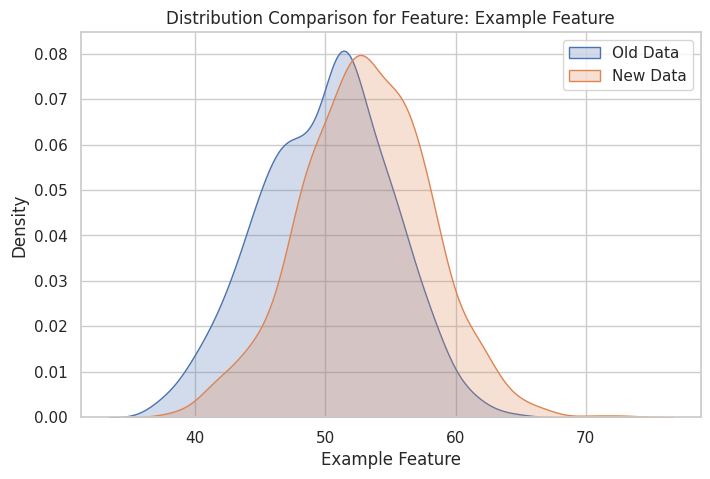


--- Profiling Numeric Data and Detecting Outliers ---

=== Numeric Data Profiling and Outlier Detection ===

Profiling 'sepal length (cm)':
  Mean: 5.843, Std Dev: 0.828
  Outliers (IQR): 0
  Outliers (Z-score): 0


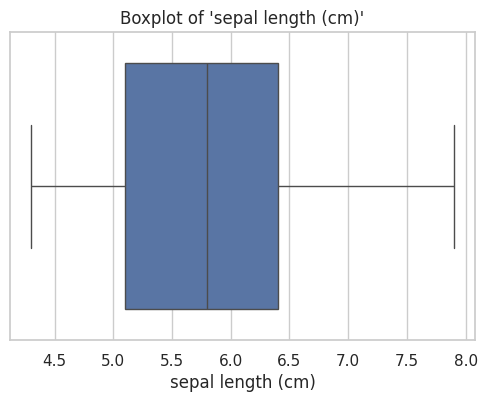

Profiling 'sepal width (cm)':
  Mean: 3.057, Std Dev: 0.436
  Outliers (IQR): 4
  Outliers (Z-score): 1


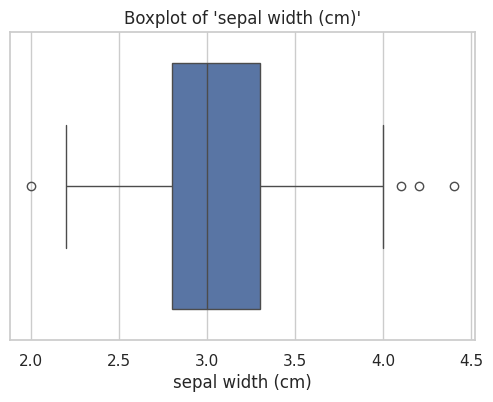

Profiling 'petal length (cm)':
  Mean: 3.758, Std Dev: 1.765
  Outliers (IQR): 0
  Outliers (Z-score): 0


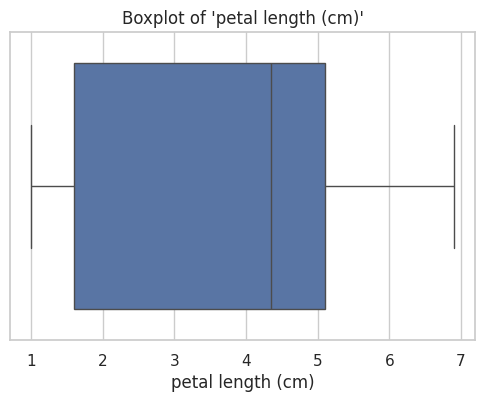

Profiling 'petal width (cm)':
  Mean: 1.199, Std Dev: 0.762
  Outliers (IQR): 0
  Outliers (Z-score): 0


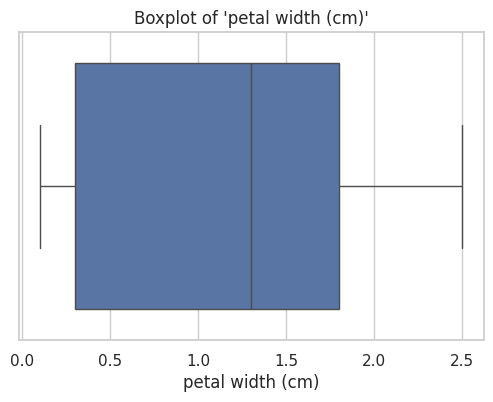

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import ks_2samp, zscore
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ---------------------------
# Utility Functions
# ---------------------------

def handle_missing_data(df, columns=None, fill_method='median'):
    """
    Detect and handle missing data in specified columns.
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        columns (list or None): Columns to check. If None, all columns are checked.
        fill_method (str): Method to fill missing data ('median', 'mean', 'mode', or None to drop).
    Returns:
        pd.DataFrame: DataFrame with missing data handled.
    """
    try:
        cols = columns if columns else df.columns.tolist()
        missing_summary = df[cols].isnull().sum()
        print("Missing values per column before handling:")
        print(missing_summary)

        if fill_method == 'median':
            for col in cols:
                if pd.api.types.is_numeric_dtype(df[col]):
                    median_val = df[col].median()
                    df[col].fillna(median_val, inplace=True)
        elif fill_method == 'mean':
            for col in cols:
                if pd.api.types.is_numeric_dtype(df[col]):
                    mean_val = df[col].mean()
                    df[col].fillna(mean_val, inplace=True)
        elif fill_method == 'mode':
            for col in cols:
                mode_val = df[col].mode()
                if not mode_val.empty:
                    df[col].fillna(mode_val[0], inplace=True)
        elif fill_method is None:
            df.dropna(subset=cols, inplace=True)
        else:
            print(f"Fill method '{fill_method}' not recognized. No filling done.")

        missing_summary_after = df[cols].isnull().sum()
        print("\nMissing values per column after handling:")
        print(missing_summary_after)

        return df
    except Exception as e:
        print(f"Error in handle_missing_data: {e}")
        return df


def remove_duplicates(df, subset=None):
    """
    Detect and remove duplicate rows.
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        subset (list or None): Columns to consider for identifying duplicates.
    Returns:
        pd.DataFrame: DataFrame with duplicates removed.
    """
    try:
        duplicate_count = df.duplicated(subset=subset).sum()
        print(f"Number of duplicate rows: {duplicate_count}")
        df_cleaned = df.drop_duplicates(subset=subset)
        return df_cleaned
    except Exception as e:
        print(f"Error in remove_duplicates: {e}")
        return df


def standardize_dates(df, date_col):
    """
    Parse and standardize date column using vectorized pandas functions.
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        date_col (str): Name of the date column.
    Returns:
        pd.DataFrame: DataFrame with standardized date column.
    """
    try:
        df[date_col] = pd.to_datetime(df[date_col], infer_datetime_format=True, errors='coerce')
        num_invalid = df[date_col].isnull().sum()
        if num_invalid > 0:
            print(f"Warning: {num_invalid} invalid/missing dates found in '{date_col}' after parsing.")
        return df
    except Exception as e:
        print(f"Error in standardize_dates: {e}")
        return df


def standardize_phone_numbers(phone_series):
    """
    Normalize phone numbers by stripping non-digit characters.
    Parameters:
        phone_series (pd.Series): Series of phone numbers.
    Returns:
        pd.Series: Normalized phone numbers as strings of digits.
    """
    try:
        normalized = phone_series.str.replace(r'\D', '', regex=True)
        return normalized
    except Exception as e:
        print(f"Error in standardize_phone_numbers: {e}")
        return phone_series


def standardize_state_abbreviations(address_series):
    """
    Standardize state abbreviations in address strings.
    Parameters:
        address_series (pd.Series): Series of address strings.
    Returns:
        pd.Series: Addresses with standardized state abbreviations.
    """
    try:
        standardized = address_series.str.replace(r'\bCalif\.?\b', 'CA', regex=True, case=False)
        return standardized
    except Exception as e:
        print(f"Error in standardize_state_abbreviations: {e}")
        return address_series


def detect_data_drift(old_data, new_data, feature, alpha=0.05):
    """
    Detect data drift between two datasets for a numeric feature.
    Uses summary statistics and Kolmogorov-Smirnov test.
    Parameters:
        old_data (pd.Series or np.array): Historical data.
        new_data (pd.Series or np.array): Recent data.
        feature (str): Feature name for reporting.
        alpha (float): Significance level.
    Returns:
        dict: Drift detection results.
    """
    try:
        stats_old = {
            'mean': np.mean(old_data),
            'median': np.median(old_data),
            'std_dev': np.std(old_data),
            'min': np.min(old_data),
            'max': np.max(old_data)
        }
        stats_new = {
            'mean': np.mean(new_data),
            'median': np.median(new_data),
            'std_dev': np.std(new_data),
            'min': np.min(new_data),
            'max': np.max(new_data)
        }

        ks_stat, p_value = ks_2samp(old_data, new_data)
        drift_detected = p_value < alpha

        print(f"\nData Drift Analysis for '{feature}':")
        print(f"Old Data Mean: {stats_old['mean']:.3f}, New Data Mean: {stats_new['mean']:.3f}")
        print(f"KS Statistic: {ks_stat:.3f}, P-value: {p_value:.5f}")
        print("Drift Detected:" if drift_detected else "No Significant Drift Detected.")

        plt.figure(figsize=(8,5))
        sns.kdeplot(old_data, label='Old Data', shade=True)
        sns.kdeplot(new_data, label='New Data', shade=True)
        plt.title(f'Distribution Comparison for Feature: {feature}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

        return {
            'old_stats': stats_old,
            'new_stats': stats_new,
            'ks_statistic': ks_stat,
            'p_value': p_value,
            'drift_detected': drift_detected
        }
    except Exception as e:
        print(f"Error in detect_data_drift: {e}")
        return None


def profile_numeric_outliers(df):
    """
    Profile numeric columns and detect outliers using IQR and Z-score methods.
    Parameters:
        df (pd.DataFrame): Input DataFrame.
    Returns:
        dict: Profiling summary with statistics and outliers.
    """
    profiling_summary = {}
    try:
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        print("\n=== Numeric Data Profiling and Outlier Detection ===\n")

        for col in numeric_cols:
            print(f"Profiling '{col}':")
            col_data = df[col].dropna()

            stats = {
                'count': col_data.count(),
                'mean': col_data.mean(),
                'median': col_data.median(),
                'std_dev': col_data.std(),
                'min': col_data.min(),
                'max': col_data.max(),
                '25%': col_data.quantile(0.25),
                '75%': col_data.quantile(0.75),
                'unique_values': col_data.nunique()
            }

            Q1 = stats['25%']
            Q3 = stats['75%']
            IQR = Q3 - Q1
            lower_fence = Q1 - 1.5 * IQR
            upper_fence = Q3 + 1.5 * IQR

            outliers_iqr = col_data[(col_data < lower_fence) | (col_data > upper_fence)]
            z_scores = zscore(col_data)
            outliers_z = col_data[(np.abs(z_scores) > 3)]

            print(f"  Mean: {stats['mean']:.3f}, Std Dev: {stats['std_dev']:.3f}")
            print(f"  Outliers (IQR): {len(outliers_iqr)}")
            print(f"  Outliers (Z-score): {len(outliers_z)}")

            plt.figure(figsize=(6,4))
            sns.boxplot(x=col_data)
            plt.title(f"Boxplot of '{col}'")
            plt.show()

            profiling_summary[col] = {
                'statistics': stats,
                'outliers_iqr': outliers_iqr.values,
                'outliers_zscore': outliers_z.values
            }
        return profiling_summary
    except Exception as e:
        print(f"Error in profile_numeric_outliers: {e}")
        return profiling_summary


# ---------------------------
# Example Usage with Sample Data
# ---------------------------

def main():
    # Sample data with missing values
    df_customers = pd.DataFrame({
        'customer_id': [1, 2, 3, 4, 5],
        'email': ['alice@example.com', None, 'charlie@example.com', '', 'eve@example.com']
    })

    df_sales = pd.DataFrame({
        'transaction_id': [101, 102, 103, 104],
        'transaction_date': ['2025-01-10', None, '2025-01-12', '']
    })

    df_employees = pd.DataFrame({
        'employee_id': [1001, 1002, 1003, 1004],
        'department': ['HR', None, 'Finance', '']
    })

    # Handle missing data
    print("\n--- Handling Missing Data ---")
    df_customers = handle_missing_data(df_customers, columns=['email'], fill_method=None)
    df_sales = handle_missing_data(df_sales, columns=['transaction_date'], fill_method=None)
    df_employees = handle_missing_data(df_employees, columns=['department'], fill_method=None)

    # Remove duplicates example
    print("\n--- Removing Duplicates ---")
    df_customers_dup = pd.DataFrame({
        'customer_id': [1, 2, 2, 3],
        'name': ['Alice', 'Bob', 'Bob', 'Charlie']
    })
    df_customers_dup_clean = remove_duplicates(df_customers_dup, subset=['customer_id', 'name'])

    # Standardize dates
    print("\n--- Standardizing Dates ---")
    df_sales = standardize_dates(df_sales, 'transaction_date')

    # Normalize phone numbers example
    print("\n--- Normalizing Phone Numbers ---")
    phones = pd.Series(['123-456-7890', '(123) 456-7890', '1234567890', '+1 123 456 7890'])
    normalized_phones = standardize_phone_numbers(phones)
    print(normalized_phones)

    # Standardize state abbreviations example
    print("\n--- Standardizing State Abbreviations ---")
    addresses = pd.Series([
        '123 Main St, Los Angeles, CA',
        '456 Elm St, San Francisco, Calif.',
        '789 Oak St, San Diego, CA',
        '101 Pine St, Sacramento, Calif'
    ])
    standardized_addresses = standardize_state_abbreviations(addresses)
    print(standardized_addresses)

    # Detect data drift example
    print("\n--- Detecting Data Drift ---")
    old_data = np.random.normal(loc=50, scale=5, size=1000)
    new_data = np.random.normal(loc=53, scale=5, size=1000)
    detect_data_drift(old_data, new_data, feature='Example Feature')

    # Profile numeric columns and detect outliers
    print("\n--- Profiling Numeric Data and Detecting Outliers ---")
    from sklearn.datasets import load_iris
    iris = load_iris()
    df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    profile_numeric_outliers(df_iris)

if __name__ == "__main__":
    main()

